In [1]:
#!pip install mysqlclient
#!pip install bellmanford
#!pip install networkx
#!pip install ccxt

In [2]:
import OrderbookAnalyser as OrderbookAnalyser

In [3]:
vol_BTC=[1,0.1,0.01]
exchangeList = ['coinfloor','kraken','bitfinex','bittrex','gdax','bitstamp','coinbase','poloniex']
limit = 10000
runLocalDB=True
df = OrderbookAnalyser.simFromDB(runLocalDB=runLocalDB,vol_BTC=vol_BTC,exchangeList=exchangeList,limit=limit)


3it [00:00, 28.77it/s]

Rows fetched: 10000


10000it [04:50, 34.41it/s]


In [4]:
df.head()

,id,vol_BTC,length,profit_perc,nodes,edges_weight,edges_age_s,hops,exchanges_involved,nof_exchanges_involved
0,128040,0.01,-0.005412,0.542651,"poloniex-BTC,bittrex-BTC,bittrex-FCT,poloniex-...","0.0,-7.103104152468829,0.0,7.097692317691691","0,0.0,0,1.6516199111938477",4,"bittrex,poloniex",2
1,128042,0.01,-0.005412,0.542651,"poloniex-BTC,bittrex-BTC,bittrex-FCT,poloniex-...","0.0,-7.103104152468829,0.0,7.097692317691691","0,0.026290178298950195,0,1.6779100894927979",4,"bittrex,poloniex",2
2,128063,1.00,-0.001366,0.136650,"bitstamp-BTC,bitstamp-USD,gdax-USD,gdax-BTC,bi...","-8.76239113046495,0.0,8.761025558558117,0.0","-1532914923371.777,0,0.0,0",4,"bitstamp,gdax",2
3,128063,0.10,-0.001488,0.148876,"bitstamp-BTC,bitstamp-USD,gdax-USD,gdax-BTC,bi...","-8.76251321518543,0.0,8.761025558558117,0.0","-1532914923371.777,0,0.0,0",4,"bitstamp,gdax",2
4,128063,0.01,-0.005412,0.542651,"poloniex-BTC,bittrex-BTC,bittrex-FCT,poloniex-...","0.0,-7.103104152468829,0.0,7.097692317691691","0,0.3746302127838135,0,2.026250123977661",4,"bittrex,poloniex",2


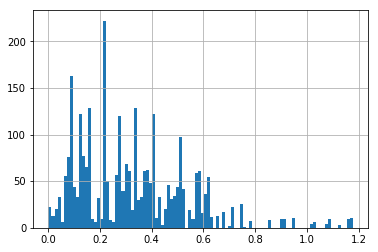

In [5]:
df['profit_perc'].hist(bins=100)

In [6]:
df[['exchanges_involved', 'profit_perc','vol_BTC']].groupby(['exchanges_involved','vol_BTC']).agg(['min','max','mean', 'count']).sort_values([('profit_perc', 'mean')], ascending=False)

profit_perc                          
                                               min       max      mean count
exchanges_involved             vol_BTC                                      
bitstamp,gdax,kraken           0.01       1.169092  1.169092  1.169092     9
                               0.10       1.155806  1.155806  1.155806     9
                               1.00       1.082541  1.082541  1.082541     9
bitstamp,coinfloor,gdax,kraken 0.01       1.018695  1.018695  1.018695     4
                               1.00       0.941744  0.941744  0.941744     4
bitstamp,kraken                1.00       0.627943  0.627943  0.627943    12
                               0.10       0.328938  0.672682  0.614796    16
bittrex,poloniex               0.01       0.542651  0.542651  0.542651    13
bitstamp,coinfloor,gdax        1.00       0.083607  1.073477  0.510716    90
                               0.10       0.095826  1.176267  0.503621    49
bitstamp,kraken                0.01       0.272570  0.672682  0.454079     7
bitstamp,coinfloor,gdax        0.01       0.100990  1.127194  0.429566    69
bitstamp,gdax                  0.01       0.119708  0.780516  0.408166   391
                               0.10       0.108507  0.751662  0.407430   433
                               1.00       0.009172  0.752687  0.374439   403
bitstamp,gdax,poloniex         1.00       0.373884  0.373884  0.373884     3
bitstamp,coinfloor,poloniex    1.00       0.338826  0.338826  0.338826     4
bitstamp,coinfloor             1.00       0.087844  0.713629  0.256168   330
                               0.10       0.087844  0.743299  0.240947   301
                               0.01       0.087844  0.748495  0.239694   254
bitstamp                       0.01       0.009407  0.497984  0.140842   204
                               0.10       0.028533  0.492724  0.135763   139
                               1.00       0.001381  0.347705  0.066459    90